In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df1 = pd.read_csv('experiment_data/experiment_data_1.csv')
df2 = pd.read_csv('experiment_data/experiment_data_2.csv')
df3 = pd.read_csv('experiment_data/experiment_data_3.csv')
df4 = pd.read_csv('experiment_data/experiment_data_4.csv')
df5 = pd.read_csv('experiment_data/experiment_data_5.csv')
df6 = pd.read_csv('experiment_data/experiment_data_6.csv')
df7 = pd.read_csv('experiment_data/experiment_data_7.csv')
df8 = pd.read_csv('experiment_data/experiment_data_8.csv')
df9 = pd.read_csv('experiment_data/experiment_data_9.csv')
df10 = pd.read_csv('experiment_data/experiment_data_10.csv')

In [21]:
win_rates = pd.concat([df1[['snaking', 'path_info', 'column_nr']], df1['win_rate'], df2['win_rate'], df3['win_rate'], df4['win_rate'], df5['win_rate'], df6['win_rate'], df7['win_rate'], df8['win_rate'], df9['win_rate'], df10['win_rate']], axis=1)
win_rates

,snaking,path_info,column_nr,win_rate,win_rate,win_rate,win_rate,win_rate,win_rate,win_rate,win_rate,win_rate,win_rate
0,False,False,False,0.426667,0.826667,0.780000,0.760000,0.793333,0.813333,0.853333,0.786667,0.766667,0.520000
1,True,False,False,0.120000,0.113333,0.093333,0.100000,0.166667,0.173333,0.126667,0.100000,0.093333,0.106667
2,False,True,False,0.453333,0.593333,0.533333,0.460000,0.520000,0.526667,0.553333,0.606667,0.613333,0.466667
3,False,False,True,0.733333,0.633333,0.846667,0.506667,0.580000,0.713333,0.693333,0.673333,0.706667,0.586667
4,False,True,True,0.573333,0.466667,0.733333,0.513333,0.466667,0.533333,0.533333,0.720000,0.573333,0.413333
5,True,False,True,0.113333,0.113333,0.020000,0.120000,0.080000,0.066667,0.093333,0.133333,0.153333,0.160000
6,True,True,False,0.240000,0.446667,0.186667,0.266667,0.193333,0.246667,0.273333,0.220000,0.313333,0.240000
7,True,True,True,0.246667,0.453333,0.220000,0.193333,0.120000,0.300000,0.313333,0.386667,0.306667,0.193333


In [22]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

numeric_cols = df1.select_dtypes(include=['float64', 'bool']).columns
object_cols = df1.select_dtypes(include=['object']).columns

sum_df = pd.DataFrame(0, index=dfs[0].index, columns=numeric_cols)

for df in dfs:
    sum_df += df[numeric_cols]

average_df = sum_df / len(dfs)

bool_cols = ['snaking', 'path_info', 'column_nr']

average_df[bool_cols] = average_df[bool_cols].replace(1.0, True)
average_df[bool_cols] = average_df[bool_cols].replace(0.0, False)

average_df = average_df.round(3)

average_df

/var/folders/mx/18yhkkp57f9374hs9zhybf3h0000gp/T/ipykernel_1405/2889401734.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  average_df[bool_cols] = average_df[bool_cols].replace(0.0, False)


,snaking,path_info,column_nr,avg_leniency,avg_linearity,avg_density,med_leniency,med_linearity,med_density,win_rate,completion_percentage
0,False,False,False,2.506,0.752,0.007,2.472,0.964,0.000,0.733,85.687
1,True,False,False,2.746,0.317,0.042,2.501,0.177,0.031,0.119,46.350
2,False,True,False,1.497,0.604,0.026,1.189,0.787,0.009,0.533,77.691
3,False,False,True,2.129,0.682,0.016,2.080,0.901,0.002,0.667,82.377
4,False,True,True,1.459,0.588,0.025,1.191,0.760,0.010,0.553,75.833
5,True,False,True,2.808,0.347,0.037,2.469,0.202,0.026,0.105,40.879
6,True,True,False,1.582,0.557,0.027,1.289,0.614,0.017,0.263,69.397
7,True,True,True,1.576,0.547,0.027,1.294,0.629,0.015,0.273,66.513


In [23]:
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

all_data = pd.concat(dfs)
numeric_columns = all_data.select_dtypes(include='number').columns

mean_df = pd.concat([df[numeric_columns] for df in dfs]).groupby(level=0).mean()
std_df = pd.concat([df[numeric_columns] for df in dfs]).groupby(level=0).std()

for column in dfs[0].columns:
    if column not in numeric_columns:
        mean_df[column] = dfs[0][column]
        std_df[column] = dfs[0][column]

# print("Mean DataFrame:")
# mean_df.head(8)

std_df = std_df.round(3)

print("\nStandard Deviation DataFrame:")
std_df



Standard Deviation DataFrame:


,avg_leniency,avg_linearity,avg_density,med_leniency,med_linearity,med_density,win_rate,completion_percentage,snaking,path_info,column_nr,mod_leniency,mod_linearity,mod_density
0,0.267,0.074,0.004,0.287,0.022,0.000,0.141,10.158,False,False,False,"(0.8444444444444444, 2)","(1.0, 57)","(0.0, 92)"
1,0.163,0.062,0.014,0.143,0.060,0.020,0.029,3.548,True,False,False,"(2.1194444444444445, 2)","(1.0, 15)","(0.0, 44)"
2,0.063,0.066,0.006,0.062,0.242,0.008,0.060,5.042,False,True,False,"(0.6666666666666666, 2)","(0.95, 54)","(0.0, 71)"
3,0.165,0.100,0.006,0.132,0.105,0.003,0.095,5.525,False,False,True,"(2.111111111111111, 3)","(1.0, 59)","(0.0, 100)"
4,0.185,0.044,0.003,0.094,0.201,0.005,0.104,8.299,False,True,True,"(0.8944444444444444, 2)","(0.95, 55)","(0.0, 75)"
5,0.123,0.055,0.010,0.104,0.046,0.014,0.042,5.406,True,False,True,"(1.9, 2)","(1.0, 14)","(0.0, 51)"
6,0.165,0.065,0.008,0.084,0.224,0.011,0.075,6.208,True,True,False,"(0.6777777777777778, 2)","(0.95, 49)","(0.0, 61)"
7,0.143,0.069,0.007,0.091,0.248,0.010,0.099,8.306,True,True,True,"(0.6944444444444444, 2)","(0.95, 29)","(0.0, 50)"


In [24]:
average_df.to_csv('/Users/uni/Documents/Thesis/self/average_data.csv')

In [25]:
average_df.loc[average_df['snaking'] == False]

,snaking,path_info,column_nr,avg_leniency,avg_linearity,avg_density,med_leniency,med_linearity,med_density,win_rate,completion_percentage
0,False,False,False,2.506,0.752,0.007,2.472,0.964,0.000,0.733,85.687
2,False,True,False,1.497,0.604,0.026,1.189,0.787,0.009,0.533,77.691
3,False,False,True,2.129,0.682,0.016,2.080,0.901,0.002,0.667,82.377
4,False,True,True,1.459,0.588,0.025,1.191,0.760,0.010,0.553,75.833


In [26]:
average_df.loc[average_df['snaking'] == True]

,snaking,path_info,column_nr,avg_leniency,avg_linearity,avg_density,med_leniency,med_linearity,med_density,win_rate,completion_percentage
1,True,False,False,2.746,0.317,0.042,2.501,0.177,0.031,0.119,46.350
5,True,False,True,2.808,0.347,0.037,2.469,0.202,0.026,0.105,40.879
6,True,True,False,1.582,0.557,0.027,1.289,0.614,0.017,0.263,69.397
7,True,True,True,1.576,0.547,0.027,1.294,0.629,0.015,0.273,66.513


### Analysis of featureless levels
When all features are turned off, suprisingly, the completability of the levels seem to be highest compared to all other configurations. When qualitatively inspecting the levels, the levels also seem to be the most 'normal' of them all: flat floor (density is also 5 times lower than all other configurations, confirming this), some pipes sticking out of the ground, and some platforms with power up boxes. Also, it seems in this configuration that there are a lot more enemnies. This explain the big jump in leniency, suggesting the levels are harder. (fig 0)

### Analysis snaking
In al cases when snaking is turned on, win-rate seems to be considerably lower suggesting that snaking is a detriment to creating completable levels. Density is high compared to when snaking is turned off. This suggests there are a lot of hills. Indeed when qualitatively inspecting the levels, there seems to be a common theme of floating pieces of ground and these are far apart, which confirms that these are uncompletable for the player. (fig 1)

When path information is added to snaking, the win-rate doubles, the linearity goes up and the density remains stable. The liniency goes down, suggesting there are a lot less wide gaps, even though the density stayed the same. An important observation however, is that is seems like the model forgets what it up and down. The simulated player path sometimes sticks to the underside of certain platforms. This could be due to how in our snaking approach, we double the training set by starting once at the bottom and once at the top and put these together in the training set. (fig 2)

Column number information doesn't seem to have as much of an effect as path information did. When column number was turned on the win rate went down slightly, with density and linearity staying the same. 

When both column number and path information are added in combination with snaking, there are also no significant differences. The results are similar to the configuration with snaking and path info added, but without column number. 

In [27]:
average_df.loc[(average_df['path_info'] == False) & (average_df['snaking'] == False)]

,snaking,path_info,column_nr,avg_leniency,avg_linearity,avg_density,med_leniency,med_linearity,med_density,win_rate,completion_percentage
0,False,False,False,2.506,0.752,0.007,2.472,0.964,0.000,0.733,85.687
3,False,False,True,2.129,0.682,0.016,2.080,0.901,0.002,0.667,82.377


In [28]:
average_df.loc[(average_df['path_info'] == True) & (average_df['snaking'] == False)]

,snaking,path_info,column_nr,avg_leniency,avg_linearity,avg_density,med_leniency,med_linearity,med_density,win_rate,completion_percentage
2,False,True,False,1.497,0.604,0.026,1.189,0.787,0.009,0.533,77.691
4,False,True,True,1.459,0.588,0.025,1.191,0.760,0.010,0.553,75.833


### Analysis path information. 
When adding only path information, the biggest change is the density which goes way up. There are simply way more gaps in the levels, also noticable in the fact that the linearity goes down. The leniency also goes down, explained by the fact that there are a lot less enemies. Overall, the levels eem way more empty. There are less pipes and less enemies. Also, path information does not always function as expected. Sometimes, the player path floats in the air and takes paths that shouldn't be possible normally. (fig 3)


### Analysis column number.
When adding only column number, the changes seem to be minimal. Compared to the other 2 features, the metrics seem to change less dramatically. The levels are seem to be most identical to the levels generated without any features. The biggest change is that the levels seem to become more daring, generating more gaps and weird structures.


When combining path info and column number, the results are close to those with only path information, also suggesting column number has less efect than the others. 



## Plots

In [29]:
average_df['configuration'] ='path_info: ' + average_df['path_info'].astype(str)
average_df
# 'snaking: ' + average_df['snaking'].astype(str) + '\n' + 

,snaking,path_info,column_nr,avg_leniency,avg_linearity,avg_density,med_leniency,med_linearity,med_density,win_rate,completion_percentage,configuration
0,False,False,False,2.506,0.752,0.007,2.472,0.964,0.000,0.733,85.687,path_info: False
1,True,False,False,2.746,0.317,0.042,2.501,0.177,0.031,0.119,46.350,path_info: False
2,False,True,False,1.497,0.604,0.026,1.189,0.787,0.009,0.533,77.691,path_info: True
3,False,False,True,2.129,0.682,0.016,2.080,0.901,0.002,0.667,82.377,path_info: False
4,False,True,True,1.459,0.588,0.025,1.191,0.760,0.010,0.553,75.833,path_info: True
5,True,False,True,2.808,0.347,0.037,2.469,0.202,0.026,0.105,40.879,path_info: False
6,True,True,False,1.582,0.557,0.027,1.289,0.614,0.017,0.263,69.397,path_info: True
7,True,True,True,1.576,0.547,0.027,1.294,0.629,0.015,0.273,66.513,path_info: True


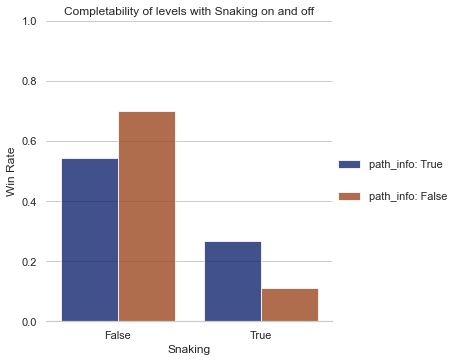

In [30]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=average_df, kind="bar",
    x="snaking", y="win_rate", hue="configuration", 
    hue_order=['path_info: True', 'path_info: False'], 
    palette="dark", alpha=.8, errorbar=None
)
g.despine(left=True)
g.set_axis_labels("", "Win Rate")
plt.ylim((0,1))
plt.xlabel('Snaking')
plt.title('Completability of levels with Snaking on and off')
g.legend.set_title("")
sns.move_legend(g, labelspacing=2, loc='center right')

In [ ]:
"""
\begin{table}[h!]
\centering
\begin{tabular}{|c|c|c||c|c|c|c| } 
 \hline
 Snaking & Path Info & Column Nr & ... & Win Rate (\%) \\ [0.5ex] 
 \hline\hline
 False & False & False & ... & 73.3 (14.1) \\ 
 \hline
 True & False & False  & ... & 11.9 (2.9) \\ 
 \hline
 False & True & False  & ... & 53.3 (6.0) \\ 
 \hline
 False & False & True  & ... & 66.7 (9.5) \\ 
 \hline
 False & True & True   & ... & 55.3 (10.4) \\
 \hline
 True & False & True   & ... & 10.5 (4.2) \\ 
 \hline
 True & True & False   & ... & 26.3 (7.5) \\ 
 \hline
 True & True & True    & ... & 27.3 (9.9) \\ 
 \hline
 \hline
\end{tabular}
\caption{Average results over 10 experiments with standard deviation.}
\label{table:1}
\end{table}
%
"""